In [10]:
import seml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

In [11]:
results = seml.get_results('final_baseline3000hvg_CT', to_data_frame=True)

  0%|          | 0/379 [00:00<?, ?it/s]

  0%|          | 0/379 [00:00<?, ?it/s]

In [12]:
#results.to_csv("./results/final_baseline3000hvg_CT.csv")

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_and_plot(df, focused_columns):
    # Group by the specified columns
    groups = df.groupby(["config.addl_dataset_train", "config.n_layers"])

    # Calculate mean, standard deviation for focused columns
    groups_mean = groups[focused_columns].mean()
    groups_std = groups[focused_columns].std()

    # Calculate the size of each group for the confidence interval calculation
    group_sizes = groups.size()

    # Create a new DataFrame to store the results
    summary_df = pd.DataFrame()

    # Calculating mean, standard deviation, and 95% CI
    for col in focused_columns:
        summary_df[f'{col}_mean'] = groups_mean[col]
        summary_df[f'{col}_std'] = groups_std[col]

        # Standard Error
        se = groups_std[col] / np.sqrt(group_sizes)
        # 95% CI
        ci = 1.96 * se
        summary_df[f'{col}_95CI_lower'] = groups_mean[col] - ci
        summary_df[f'{col}_95CI_upper'] = groups_mean[col] + ci

    # Resetting index for better readability
    summary_df.reset_index(inplace=True)

    # Group by 'config.addl_dataset_train'
    grouped_summary = summary_df.groupby('config.addl_dataset_train')

    # Creating dataframes for the highest mean for each focused column
    highest_mean_dfs = [
        grouped_summary.apply(lambda x: x.nlargest(1, col)).reset_index(drop=True)
        for col in [f'{c}_mean' for c in focused_columns]
    ]

    # Setting up the figure for side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=len(focused_columns), figsize=(20, 6))

    # Plotting for each focused column
    for i, df in enumerate(highest_mean_dfs):
        plot_mean_with_ci_subplot(
            df, f'{focused_columns[i]}: Mean with CI',
            f'{focused_columns[i]}_mean', f'{focused_columns[i]}_95CI_lower', f'{focused_columns[i]}_95CI_upper',
            axes[i]
        )

    # Adjust layout
    plt.tight_layout()
    plt.show()

def plot_mean_with_ci_subplot(df, title, y_col_mean, y_col_ci_lower, y_col_ci_upper, ax):
    # Sorting by highest mean
    df_sorted = df.sort_values(by=y_col_mean, ascending=False)

    # Plotting
    sns.barplot(x=df_sorted[y_col_mean], y=df_sorted['config.addl_dataset_train'], palette="viridis", ax=ax)
    ax.errorbar(df_sorted[y_col_mean], range(df_sorted.shape[0]), 
                xerr=[df_sorted[y_col_mean] - df_sorted[y_col_ci_lower], 
                      df_sorted[y_col_ci_upper] - df_sorted[y_col_mean]],
                fmt='none', c='black', capsize=5)
    
    ax.set_title(title)
    ax.set_xlabel('Mean Value')
    ax.set_ylabel('Dataset')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlim([0,1])

# Usage Example:
# analyze_and_plot(your_dataframe, ['column1', 'column2'])


In [52]:
def analyze_and_plot_jitter_means(df, focused_columns):
    def plot_jittered_points_subplot(df, groups_mean, highest_mean_df, focused_col, ax):
        # Sorting original dataframe based on the mean values of the groups
        sorted_groups = highest_mean_df.sort_values(by=focused_col, ascending = False)
        sorted_df = df.set_index(['config.addl_dataset_train', 'config.n_layers']).loc[sorted_groups.set_index(['config.addl_dataset_train', 'config.n_layers']).index]
        # Plotting jittered points
        sns.stripplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df, jitter=True, ax=ax, color='gray')

        # Highlighting the highest mean group
        for label, row in highest_mean_df.iterrows():
            ax.scatter(row[focused_col], row['config.addl_dataset_train'], color='blue', s=50, zorder=5)

        ax.set_title(f'{focused_col}: Jittered Points with Averages')
        ax.set_xlabel('Value')
        ax.set_ylabel('Dataset')
        ax.tick_params(axis='x', rotation=45)
        ax.axis(xmin=0,xmax=1)

    # Group by the specified columns
    groups = df.groupby(["config.addl_dataset_train", "config.n_layers"])

    # Calculate mean, standard deviation for focused columns
    groups_mean = groups[focused_columns].mean()

    # Resetting index for better readability
    groups_mean.reset_index(inplace=True)

    # Group by 'config.addl_dataset_train'
    grouped_summary = groups_mean.groupby('config.addl_dataset_train')

    # Creating dataframes for the highest mean for each focused column
    highest_mean_dfs = [
        grouped_summary.apply(lambda x: x.nlargest(1, col)).reset_index(drop=True)
        for col in focused_columns
    ]

    # Setting up the figure for side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=len(focused_columns), figsize=(20, 6))

    # Plotting for each focused column
    for i, col in enumerate(focused_columns):
        plot_jittered_points_subplot(
            df, groups_mean, highest_mean_dfs[i], col, axes[i]
        )

    # Adjust layout
    plt.tight_layout()
    plt.show()



In [51]:
def analyze_and_plot_jitter_medians(df, focused_columns):
    def plot_jittered_points_subplot(df, groups_median, highest_median_df, focused_col, ax):
        # Sorting original dataframe based on the median values of the groups
        sorted_groups = highest_median_df.sort_values(by=focused_col, ascending = False)
        sorted_df = df.set_index(['config.addl_dataset_train', 'config.n_layers']).loc[sorted_groups.set_index(['config.addl_dataset_train', 'config.n_layers']).index]
        # Plotting jittered points
        sns.stripplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df, jitter=True, ax=ax, color='gray')

        # Highlighting the highest median group
        for label, row in highest_median_df.iterrows():
            ax.scatter(row[focused_col], row['config.addl_dataset_train'], color='blue', s=50, zorder=5)

        ax.set_title(f'{focused_col}: Jittered Points with Medians')
        ax.set_xlabel('Value')
        ax.set_ylabel('Dataset')
        ax.tick_params(axis='x', rotation=45)
        ax.axis(xmin=0,xmax=1)
    # Group by the specified columns
    groups = df.groupby(["config.addl_dataset_train", "config.n_layers"])

    # Calculate median for focused columns
    groups_median = groups[focused_columns].median()

    # Resetting index for better readability
    groups_median.reset_index(inplace=True)

    # Group by 'config.addl_dataset_train'
    grouped_summary = groups_median.groupby('config.addl_dataset_train')

    # Creating dataframes for the highest median for each focused column
    highest_median_dfs = [
        grouped_summary.apply(lambda x: x.nlargest(1, col)).reset_index(drop=True)
        for col in focused_columns
    ]

    # Setting up the figure for side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=len(focused_columns), figsize=(20, 6))

    # Plotting for each focused column
    for i, col in enumerate(focused_columns):
        plot_jittered_points_subplot(
            df, groups_median, highest_median_dfs[i], col, axes[i]
        )

    # Adjust layout
    plt.tight_layout()
    plt.show()




## Top 3000 baseline

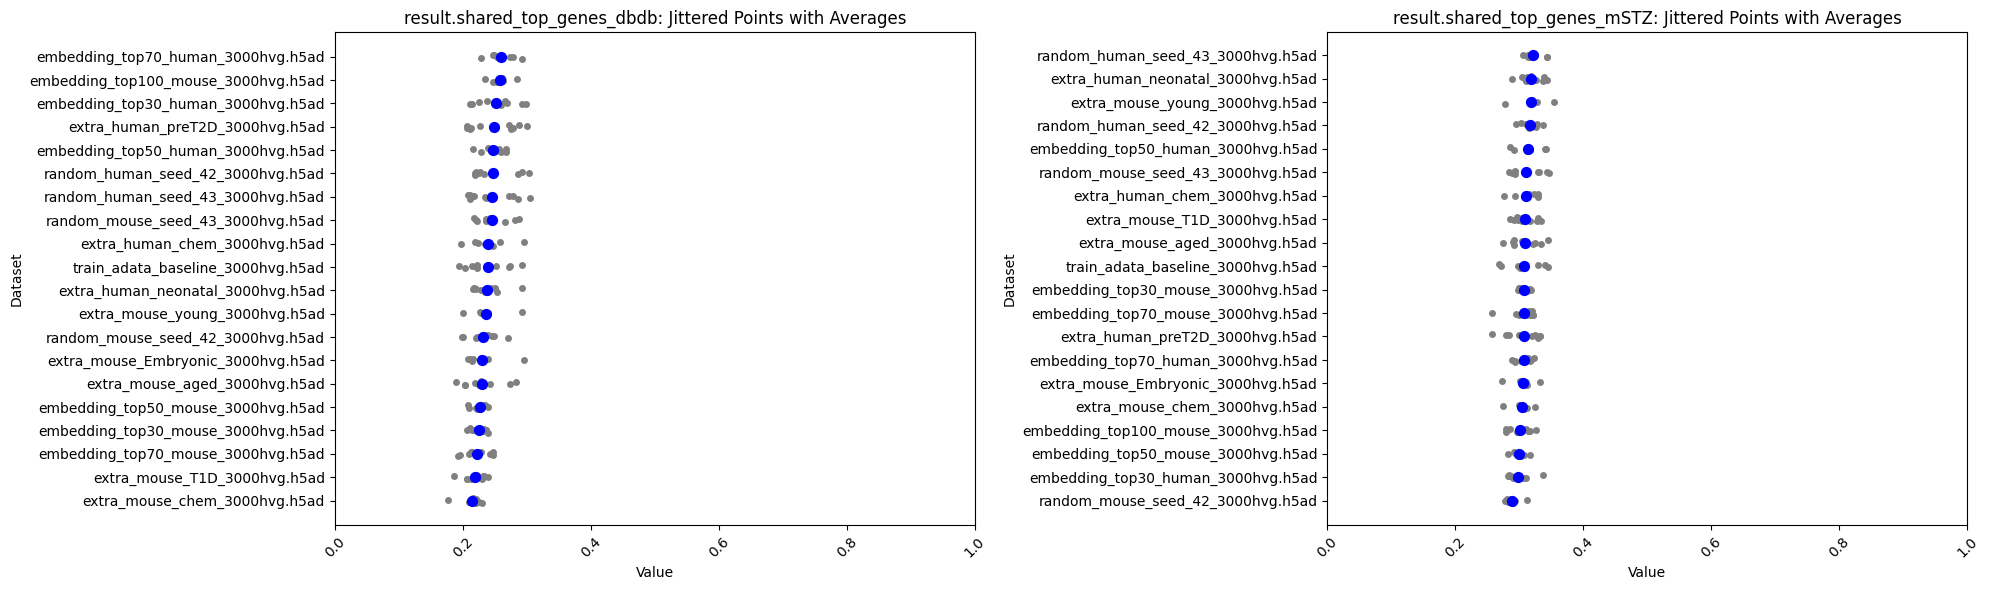

In [53]:
focused_columns = ['result.shared_top_genes_dbdb', 'result.shared_top_genes_mSTZ']
analyze_and_plot_jitter_means(results, focused_columns)

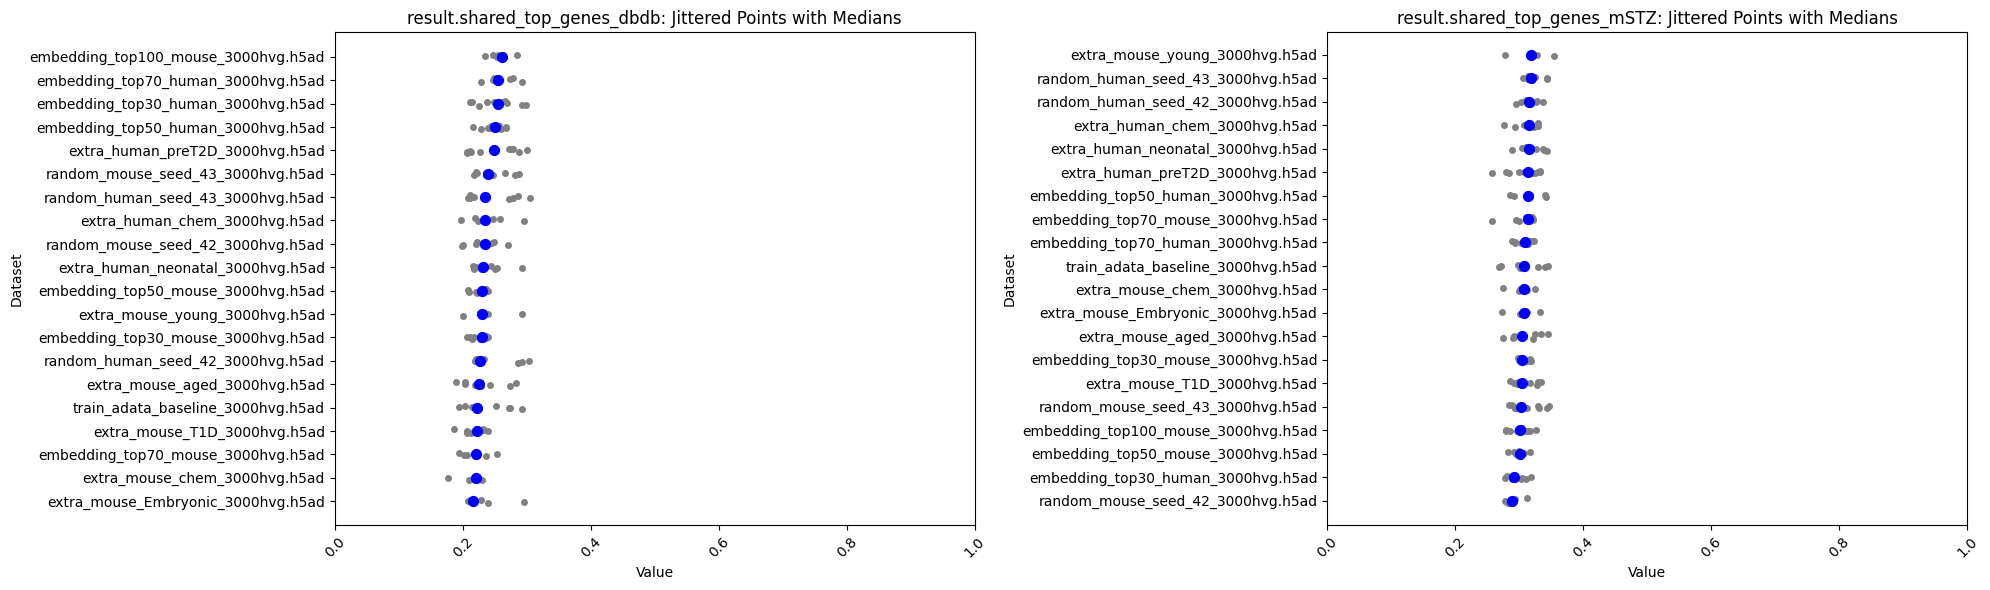

In [54]:
focused_columns = ['result.shared_top_genes_dbdb', 'result.shared_top_genes_mSTZ']
analyze_and_plot_jitter_medians(results, focused_columns)

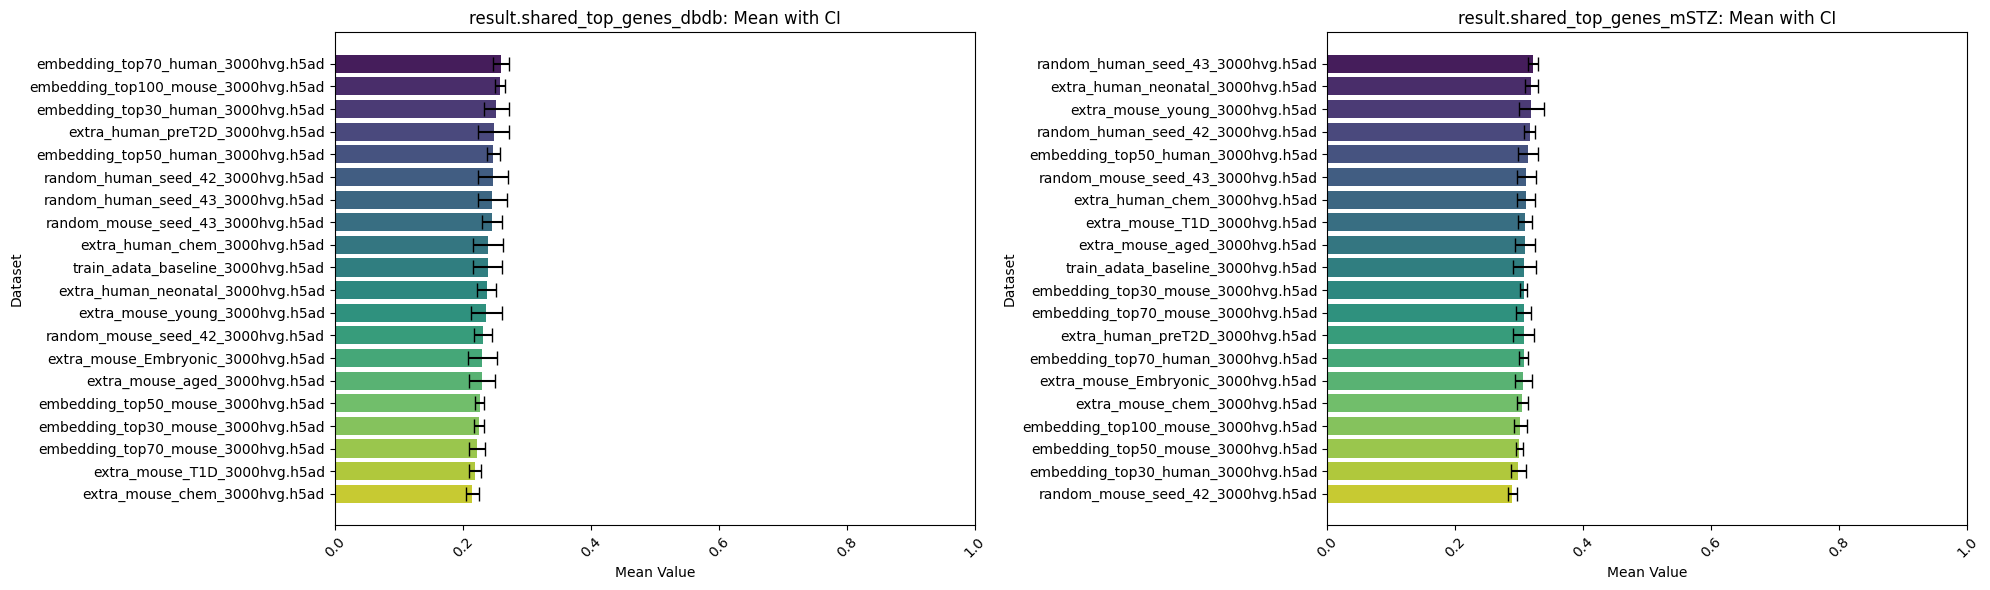

In [43]:
focused_columns = ['result.shared_top_genes_dbdb', 'result.shared_top_genes_mSTZ']
analyze_and_plot(results, focused_columns)

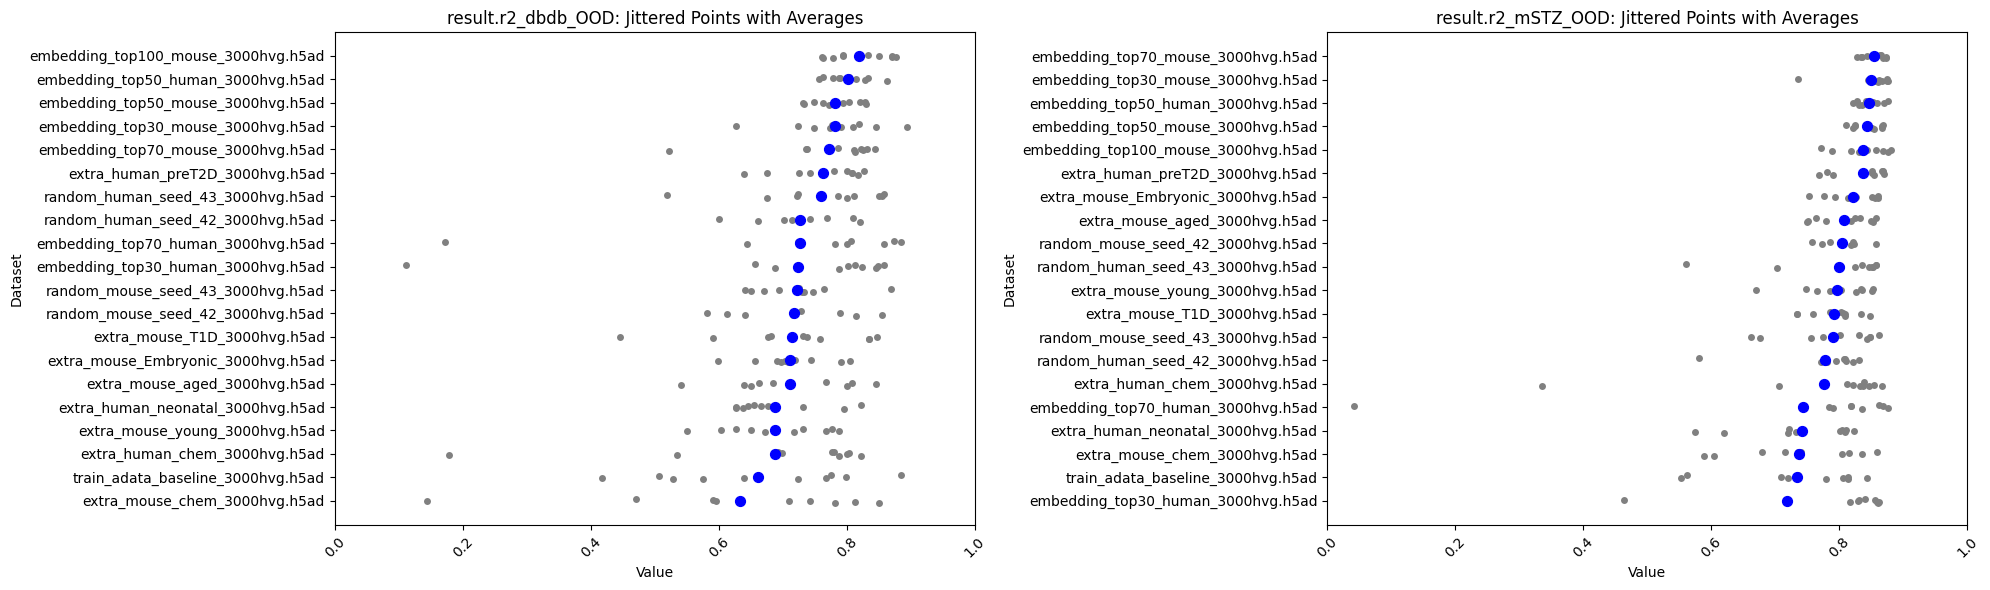

In [57]:
focused_columns = ['result.r2_dbdb_OOD', 'result.r2_mSTZ_OOD']
analyze_and_plot_jitter_means(results, focused_columns)

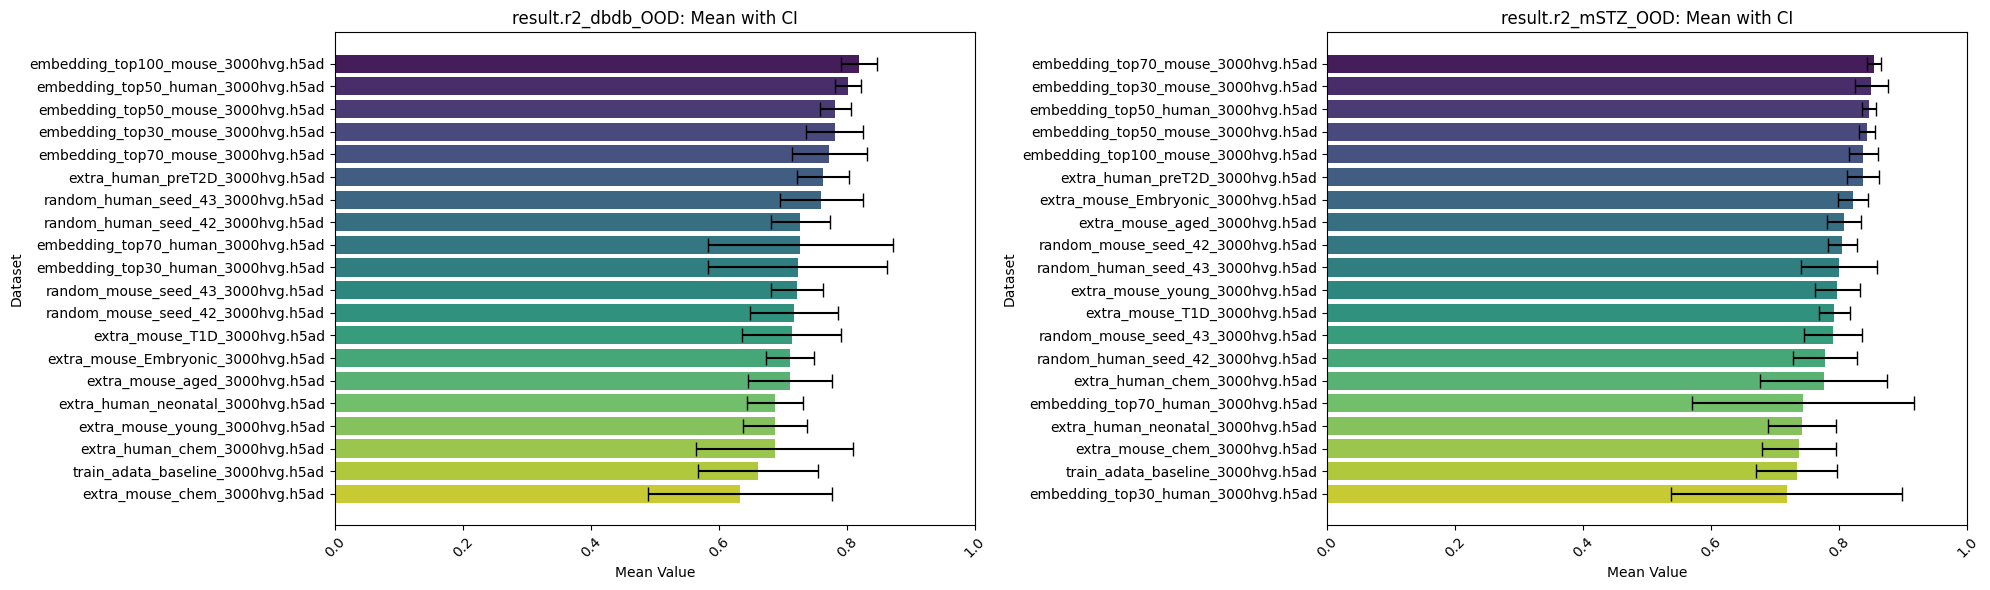

In [44]:
focused_columns = ['result.r2_dbdb_OOD', 'result.r2_mSTZ_OOD']
analyze_and_plot(results, focused_columns)

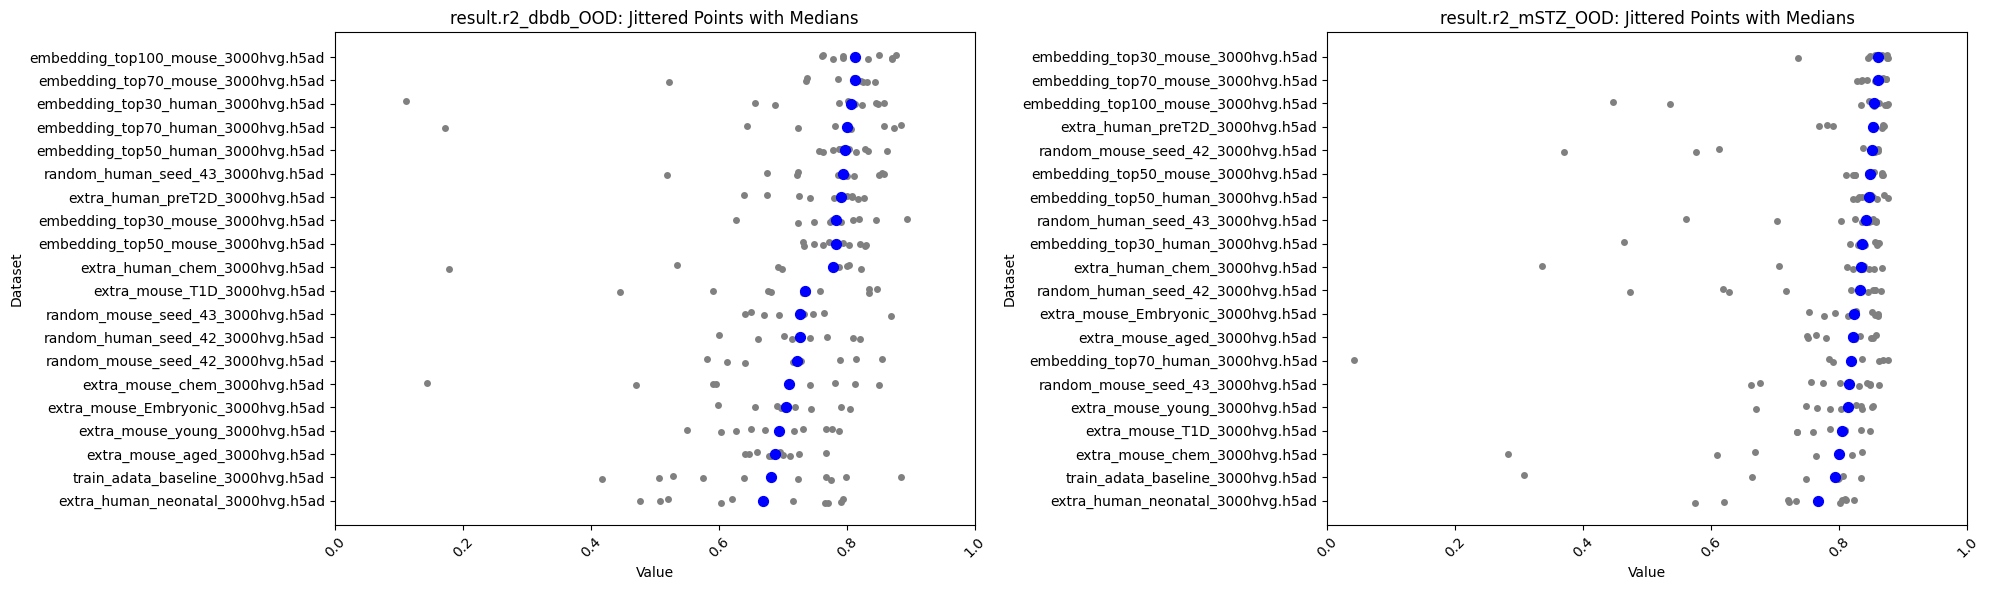

In [58]:
analyze_and_plot_jitter_medians(results, focused_columns)

### Full HVG

In [59]:
results_full = seml.get_results('final_full_CT_10reps', to_data_frame=True)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
focused_columns = ['result.shared_top_genes_dbdb', 'result.shared_top_genes_mSTZ']
analyze_and_plot_jitter_means(results_full, focused_columns)

In [ ]:
analyze_and_plot_jitter_medians(results_full, focused_columns)

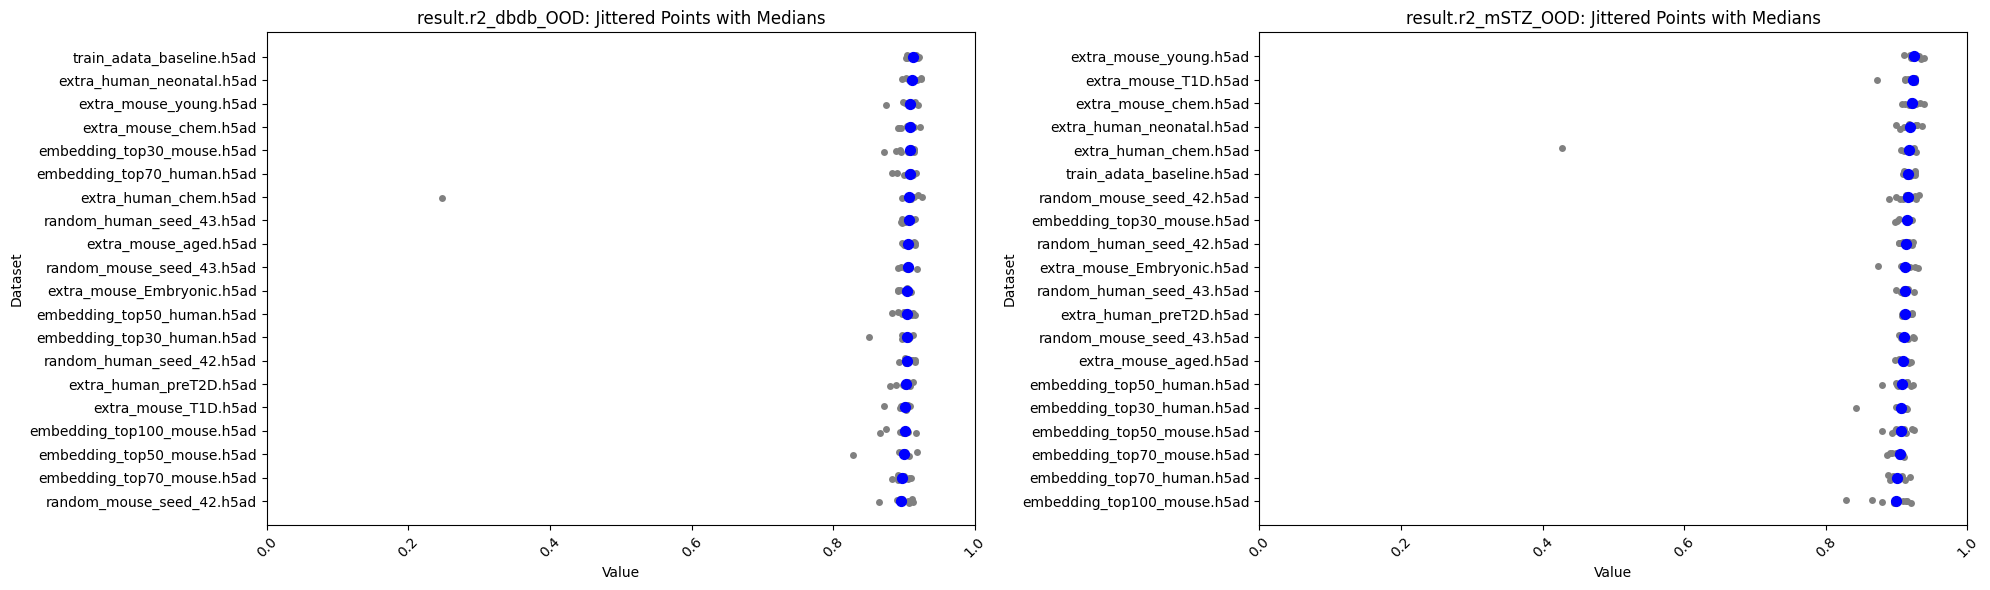

In [62]:
focused_columns = ['result.r2_dbdb_OOD', 'result.r2_mSTZ_OOD']
analyze_and_plot_jitter_medians(results_full, focused_columns)

### Merged HVG

In [123]:
results_merged = seml.get_results('final_merged_genes_CT', to_data_frame=True)

  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 0/368 [00:00<?, ?it/s]

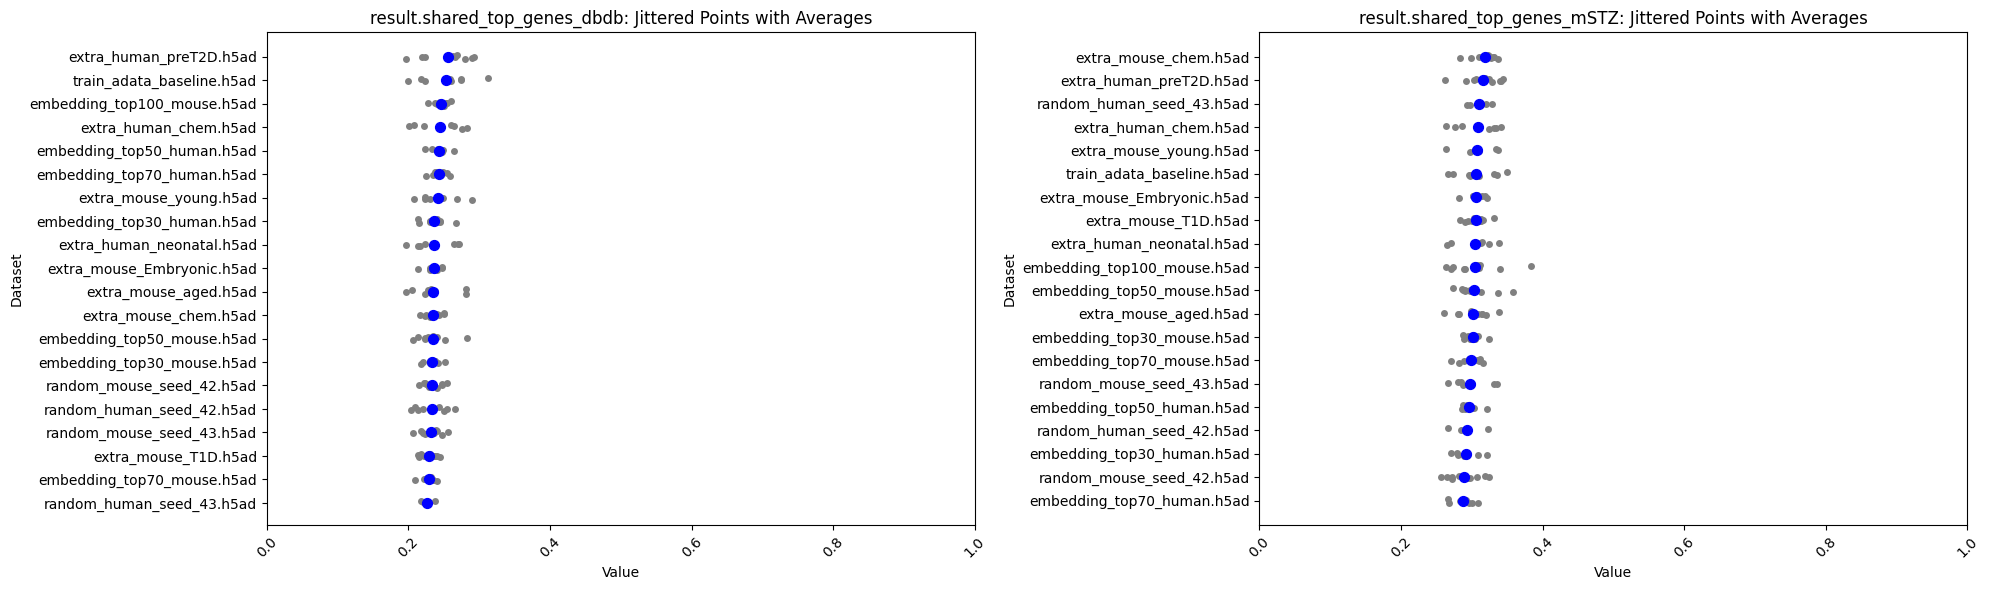

In [124]:
focused_columns = ['result.shared_top_genes_dbdb', 'result.shared_top_genes_mSTZ']
analyze_and_plot_jitter_means(results_merged, focused_columns)

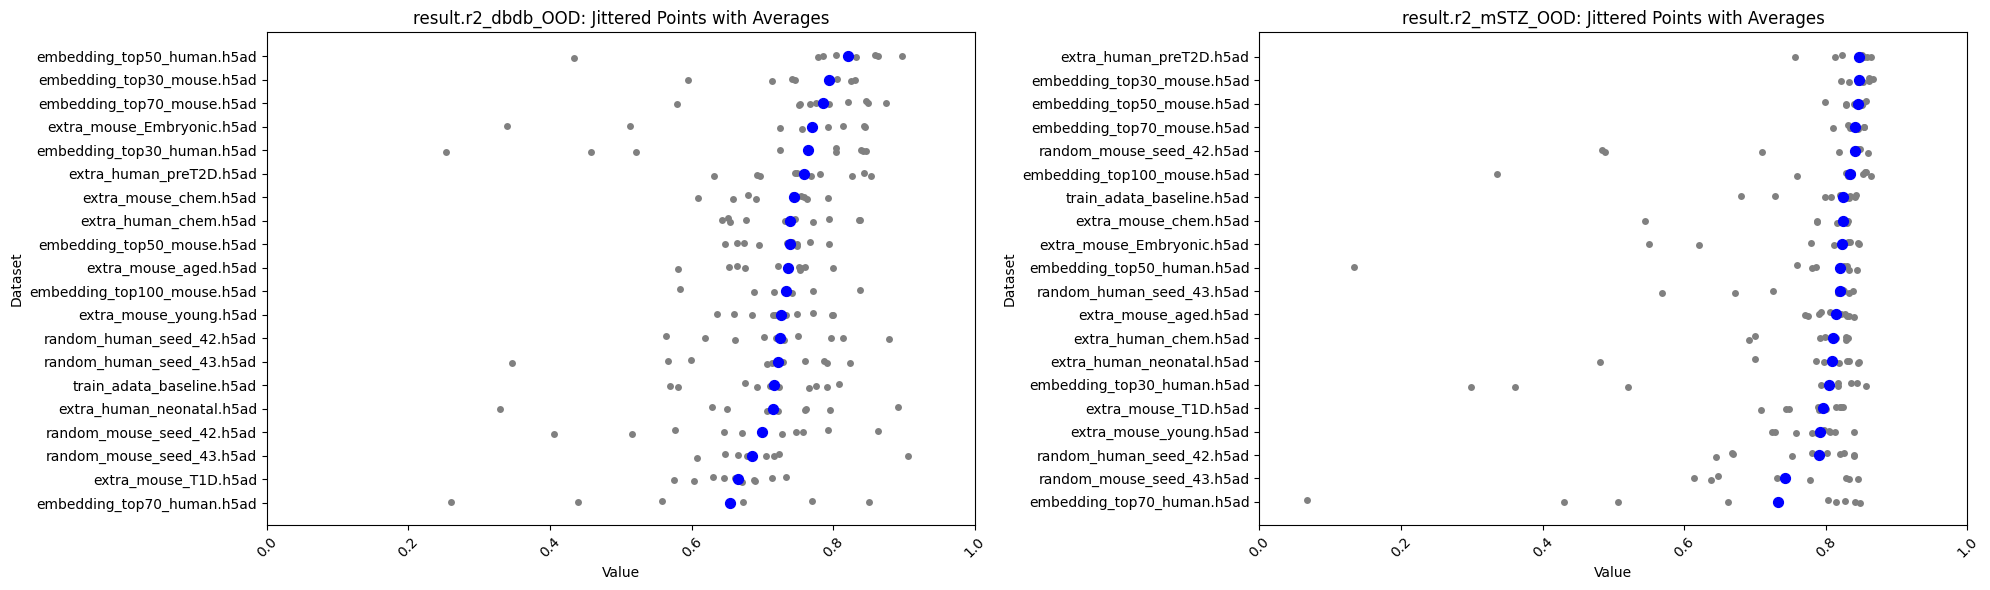

In [129]:
focused_columns = ['result.r2_dbdb_OOD', 'result.r2_mSTZ_OOD']
analyze_and_plot_jitter_medians(results_merged, focused_columns)

## Preform GSEA

In [63]:
import scanpy as sc
import gseapy as gp
import pandas as pd

In [64]:
results = seml.get_results('final_full_CT_10reps', to_data_frame=True)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [65]:
gt_dbdb = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/dbdb_ground_truth_cleanCT.h5ad")

In [66]:
gt_mSTZ = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/mSTZ_ground_truth_cleanCT.h5ad")

In [67]:
genes_considered = pd.read_table("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/make_big_dataset/genes_shared_across_datasets.txt")

In [68]:
gt_dbdb = gt_dbdb[:,gt_dbdb.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]

In [69]:
gt_mSTZ = gt_mSTZ[:,gt_mSTZ.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]

In [70]:
top_rows = []
tested_data = ['result.shared_top_genes_dbdb']
for column in tested_data:  # 'tested_data' should be a list of column names you want to check.
    for dataset in results["config.addl_dataset_train"].unique():
        # Filter the rows where 'config.addl_dataset_train' equals the current 'dataset'
        tmp_results = results[results["config.addl_dataset_train"] == dataset]
        # Get the largest value's row for the current 'column'
        top_row = tmp_results.nlargest(1, column)  # 'nlargest' takes 'n' and the 'columns' arguments
        top_rows.append(top_row)  # Append this top row to the 'top_rows' list

# Concatenate all the top rows into a single DataFrame
top_rows_df = pd.concat(top_rows, ignore_index=True)  # 'ignore_index=True' to reindex the new DataFrame

In [11]:
top_rows_df.to_csv("full_datasets_configs_to_consider.csv", index = False)

In [66]:
import os
import numpy as np
import pandas as pd
top_preds_dbdb = {}
for index, row in top_rows_df.iterrows():
    save_folder_name = "final_full_CT_10reps"  # replace with your actual save folder name if needed
    # Construct the directory path for the saved models
    save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
    save_folder = f"transVAE_train_{row['config.addl_dataset_train']}_hid{row['config.n_hidden']}_lat{int(row['config.n_latent'])}_lr{row['config.learning_rate']}_cov{int(row['config.cov_embed_dims'])}_ep{int(row['config.max_epochs'])}_ly{row['config.n_layers']}_dr{row['config.dropout_rate']}_kl{row['config.kl_weight']}_wd{row['config.weight_decay']}_s{int(row['config.seed'])}"
    dir_path = os.path.join(save_dir, save_folder)
    
    addl_dataset = row["config.addl_dataset_train"].split(".")[0]
    
    # Load the prediction file if it exists
    pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
    if os.path.exists(pred_file):
        preds = np.load(pred_file)
        top_preds_dbdb[addl_dataset] = preds
    else:
        print(f"Prediction file not found for configuration: {save_folder}")

In [71]:
gt_dbdb.obs['stim'] = pd.Categorical(gt_dbdb.obs['disease'], categories=["T2D", "normal"], ordered=True)

indices = gt_dbdb.obs.sort_values(['cell_type', 'stim']).index

gt_dbdb = gt_dbdb[indices,:]

/tmp/ipykernel_157917/4035522106.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  gt_dbdb.obs['stim'] = pd.Categorical(gt_dbdb.obs['disease'], categories=["T2D", "normal"], ordered=True)


In [72]:
from gseapy import Biomart
bm = Biomart()

m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

In [91]:
new_var = gt_dbdb.var.merge(m2h, left_index=True, right_on="ensembl_gene_id", how = "left")

In [92]:
new_var.index = new_var["hsapiens_homolog_associated_gene_name"]

In [93]:
gt_dbdb.var = new_var

In [100]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res_KEGG =  gp.gsea(data=gt_dbdb.to_df().T, # row -> genes, column-> samples
                    gene_sets="KEGG_2019_Mouse",
                    cls=gt_dbdb.obs.stim,
                    permutation_num=1000,
                    permutation_type='phenotype',
                    outdir=None,
                    method='s2n', # signal_to_noise
                    threads= 12)
t2=time.time()
print(t2-t1)

308.2886371612549


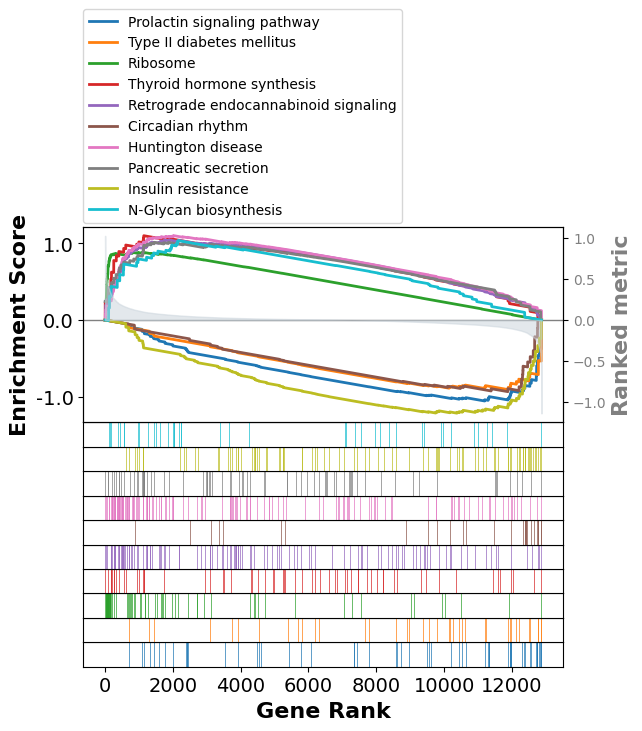

In [102]:
term = res_KEGG.res2d.Term
#gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res_KEGG.plot(terms=term[:10])

In [88]:
wang = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/data_to_predict/wang_to_predict_cleanCT.h5ad")
wang = wang[:,wang.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]

In [103]:
wang_OOD = wang[wang.obs.disease == "T2D"]
new_var = wang_OOD.var.merge(m2h, left_index=True, right_on="ensembl_gene_id", how = "left")
new_var.index = new_var["hsapiens_homolog_associated_gene_name"]
wang_OOD.var = new_var

In [ ]:
gt_dbdb_h = gt_dbdb[gt_dbdb.obs.disease == "healthy"]
gt_dbdb_h.raw = None
gt_dbdb_OOD= gt_dbdb[gt_dbdb.obs.disease == "T2D"]

from tqdm import tqdm

df = res_KEGG.res2d
df["dataset_train"] = "GT"
enrichment_dfs = dict()
gsea_objects = dict()
for dataset, X in tqdm(top_preds_dbdb.items()):
    tmp_dbdb_OOD = wang_OOD
    tmp_dbdb_OOD.X = X
    dbdb = sc.concat([gt_dbdb_h, tmp_dbdb_OOD])
    dbdb.obs['stim'] = pd.Categorical(dbdb.obs['disease'], categories=["T2D", "healthy"], ordered=True)
    indices =dbdb.obs.sort_values(['cell_type', 'stim']).index
    dbdb = dbdb[indices,:]
    res_KEGG =  gp.gsea(data=dbdb.to_df().T, # row -> genes, column-> samples
                        gene_sets="KEGG_2019_Mouse",
                        cls=dbdb.obs.stim,
                        permutation_num=1000,
                        permutation_type='phenotype',
                        outdir=None,
                        method='s2n', # signal_to_noise
                        threads= 12)
    tmp_df = res_KEGG.res2d
    tmp_df["dataset_train"] = dataset
    enrichment_dfs[dataset] = tmp_df
    gsea_objects[dataset] = res_KEGG
    

 10%|█         | 2/20 [10:25<1:33:46, 312.61s/it]

In [ ]:
res_KEGG_GT = gp.gsea(data=gt_dbdb.to_df().T, # row -> genes, column-> samples
                      gene_sets="KEGG_2019_Mouse",
                      cls=gt_dbdb.obs.stim,
                      permutation_num=1000,
                      permutation_type='phenotype',
                      outdir=None,
                      method='s2n', # signal_to_noise
                      threads= 12)

enrichment_dfs["GT"] = res_KEGG_GT.res2d

df = res_KEGG_GT.res2d

df = df[["Term","ES"]]

df.rename({"ES":"ES_GT"}, axis = 1, inplace=True)

for dataset, ES_df in enrichment_dfs.items():
    tmp_df = ES_df[["Term","ES"]]
    tmp_df.rename({"ES":"ES_" + dataset}, axis = 1, inplace=True)
    df = df.merge(tmp_df, right_on="Term", left_on="Term")

df = df.drop("ES_GT_y", axis = 1)

df.index = df.Term

df = df.drop("Term", axis = 1)

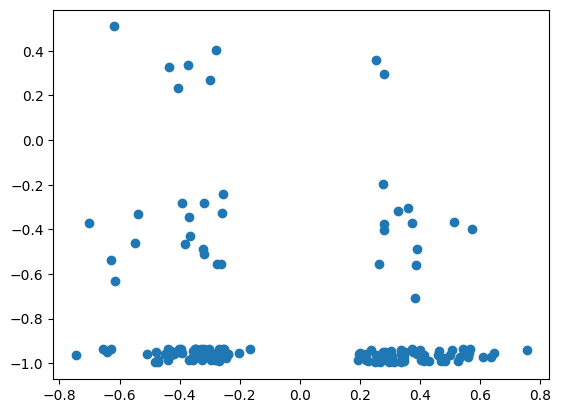

In [187]:
plt.scatter(df["ES_GT_x"],df["ES_train_adata_baseline_3000hvg"])

In [190]:
np.corrcoef(df["ES_GT_x"].tolist(), df["ES_train_adata_baseline_3000hvg"].tolist(), )

array([[ 1.        , -0.17550499],
       [-0.17550499,  1.        ]])

In [191]:
enrichment_dfs["train_adata_baseline_3000hvg"]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,dataset_train
0,gsea,cAMP signaling pathway,-0.984435,-4.072591,0.0,0.0,0.0,1/69,1.50%,GRIA4,train_adata_baseline_3000hvg
1,gsea,Pathways in cancer,-0.958369,-4.021285,0.0,0.0,0.0,5/165,4.10%,DCC;PDGFRA;IFNG;FZD10;WNT16,train_adata_baseline_3000hvg
2,gsea,MAPK signaling pathway,-0.947083,-3.950689,0.0,0.0,0.0,4/96,5.27%,PDGFRA;PLA2G4D;PTPN7;EREG,train_adata_baseline_3000hvg
3,gsea,Regulation of actin cytoskeleton,-0.995525,-3.890382,0.0,0.0,0.0,1/60,0.43%,PDGFRA,train_adata_baseline_3000hvg
4,gsea,Focal adhesion,-0.995343,-3.834484,0.0,0.0,0.0,1/75,0.43%,PDGFRA,train_adata_baseline_3000hvg
...,...,...,...,...,...,...,...,...,...,...,...
156,gsea,Progesterone-mediated oocyte maturation,-0.279832,-0.80072,0.696356,0.737518,0.989,10/15,62.53%,ADCY2;ADCY8;IGF1;MAPK10;CCNB2;MAPK11;PDE3B;CDK...,train_adata_baseline_3000hvg
157,gsea,Legionellosis,0.294137,0.788227,0.718816,0.851895,0.992,15/15,70.73%,HSPA8;HSPD1;NFKBIA;CLK1;TLR2;CD14;EEF1A2;CASP8...,train_adata_baseline_3000hvg
158,gsea,C-type lectin receptor signaling pathway,-0.242513,-0.783973,0.737052,0.753856,0.991,20/36,62.07%,PTGS2;CCL17;IL23A;CLEC1B;NLRP3;MAPK10;CBLB;EGR...,train_adata_baseline_3000hvg
159,gsea,Chronic myeloid leukemia,0.231568,0.652218,0.842213,0.883757,0.999,16/16,76.97%,GADD45G;MAPK3;CCND1;CDKN1A;NFKBIA;TGFB1;GADD45...,train_adata_baseline_3000hvg


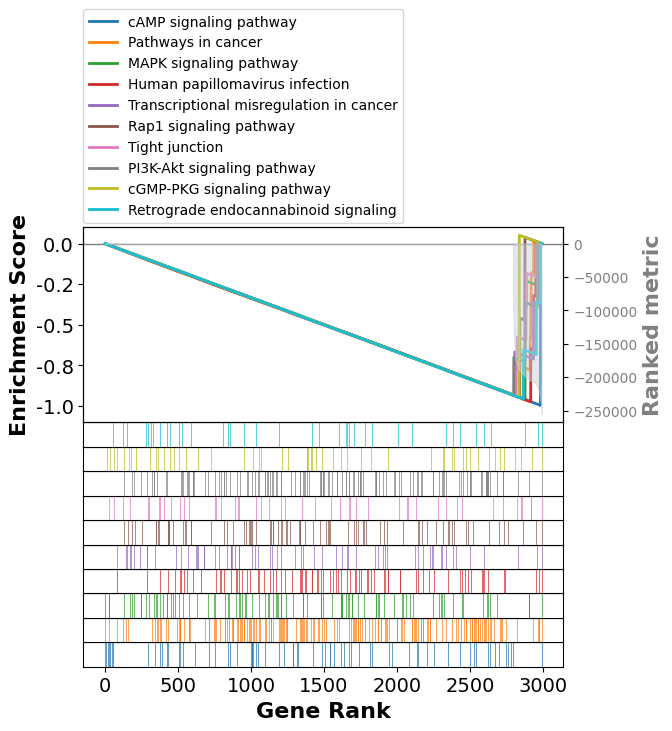

In [ ]:
term = res_KEGG.res2d.Term
#gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res_KEGG.plot(terms=term[:10])